In [2]:
# Linear Radon transform modeling with a synthetic example.

using PyPlot, Seismic

close("all")


In [13]:
# 1- Generate 2D seismic data with linear events

nt=80;
dt=0.004;
nx=32;
dx=10;

param = Dict(:nt=>nt, :dt=>dt,:nx1=>nx,:dx1=>dx, 
              :p1=>[0.0003, 0.0008, 0.000], :p2=>[0,0,0],:p3=>[0,0,0],:p4=>[0,0,0], 
              :tau=>[0.1, 0.04,0.15], :amp=>[ -1.0, 0.7,1],:f0=>70);


d,ext=SeisLinearEvents(;param...);

h = collect(0:nx-1)*dx;

# 2- Define linear moveouts p
pmin = 0;
pmax = 2.5*dt/dx;
dp = 2*dt/maximum(h);
p = collect(pmin:dp:pmax);


In [14]:
# 3- Transform to Radon domain
m = SeisRadonFreqInv(d, order="linear", dt=dt, h=h, p=p, flow=0, fhigh=125,
                     mu=1.e-5 )

# 4- Transform back to data domain
d2 = SeisRadonFreqFor(m, nt, order="linear", dt=dt, h=h, p=p, flow=0, fhigh=125)

# 5- Calculate and print modeling error (%)
e2 = 100*maximum(abs.(d-d2 ))/maximum(abs.(d2))
println("Relative error = ", e2, " %") 


Relative error = 0.17931635466248788 %


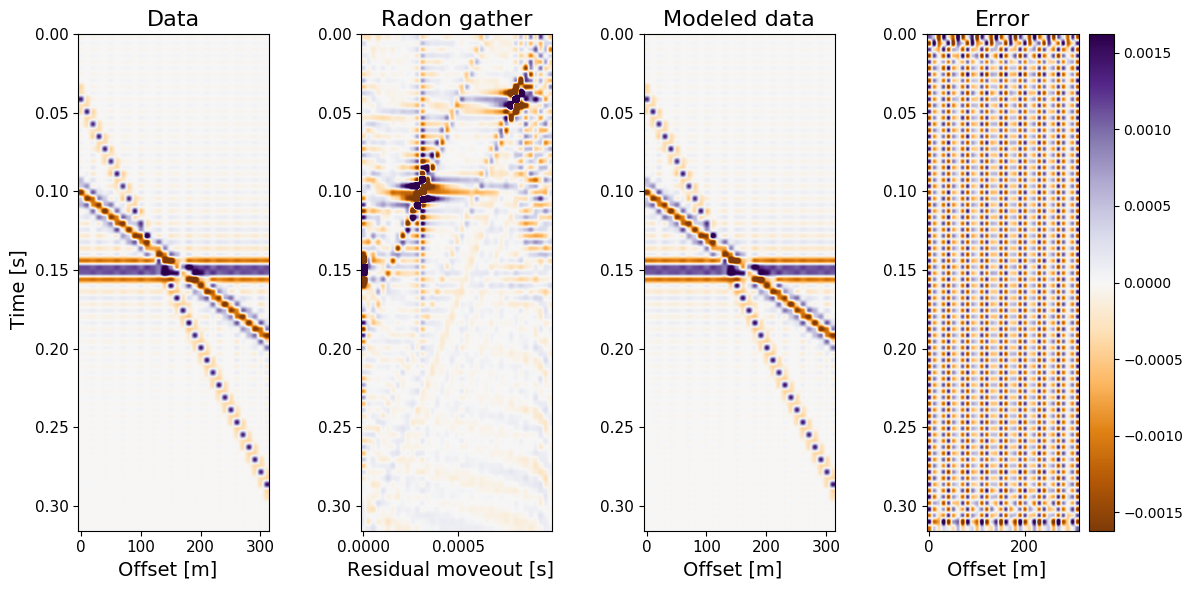

In [15]:
# 6- Plot input data, Radon gather, modeled data and modeling Error
figure(1, figsize=(12,6));
subplot(141)
SeisPlot(d, title="Data", xlabel="Offset [m]", ylabel="Time [s]", vmin=-0.8,
         vmax = 0.8, ox=h[1], dx=dx, dy=dt, fignum=1)
subplot(142)
SeisPlot(m[1:nt, :], title="Radon gather", xlabel="Residual moveout [s]",
         ox=p[1], dx=p[2]-p[1], dy=dt, fignum=1)
subplot(143)
SeisPlot(d2, title="Modeled data", xlabel="Offset [m]", vmin = -0.8, vmax = 0.8,
         ox=h[1], dx=dx, dy=dt, fignum=1)
subplot(144)
SeisPlot(d-d2, title="Error", xlabel="Offset [m]", ox=h[1], dx=dx, dy=dt,
         fignum=1)
colorbar()
tight_layout()